In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [223]:
df1 = pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv')

In [224]:
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Characteristics

In [225]:
print(df1.shape)

(10000, 13)


In [226]:
print(df1.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [227]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [228]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


## Classification of columns

In [229]:
def seprate_data_types(df1):
    categorical = []
    continuous = []
    for column in df1.columns:                
        if df1[column].nunique() < 100:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df1)         


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  ---------------
Geography       CustomerId
Gender          Surname
Age             CreditScore
Tenure          Balance
NumOfProducts   EstimatedSalary
HasCrCard
IsActiveMember
Exited


## Data Cleaning

In [230]:
df1.isnull().sum() 

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### No missing value in the Dataset

### Outlier Treatment

In [231]:
def outliers(df1,ft):
    Q1=df1[ft].quantile(0.25)
    Q3=df1[ft].quantile(0.75)
    IQR= Q3 - Q1
    lower_fence= Q1 - 1.5*IQR
    upper_fence= Q3 + 1.5*IQR
    ls = df.index[(df[ft]<lower_fence)|(df[ft]>upper_fence)]
    return ls

In [232]:
index_list=[]
for x in ['Age','Balance','EstimatedSalary']:
    index_list.extend(outliers(df1,x))

In [233]:
index_list

[58,
 85,
 104,
 158,
 181,
 230,
 234,
 243,
 252,
 310,
 364,
 371,
 385,
 399,
 559,
 567,
 602,
 612,
 658,
 678,
 736,
 766,
 769,
 807,
 811,
 823,
 859,
 884,
 888,
 948,
 952,
 957,
 963,
 969,
 1009,
 1039,
 1040,
 1055,
 1205,
 1234,
 1235,
 1246,
 1252,
 1278,
 1285,
 1342,
 1387,
 1407,
 1410,
 1439,
 1457,
 1519,
 1543,
 1607,
 1614,
 1790,
 1810,
 1866,
 1901,
 1904,
 1907,
 1933,
 1981,
 2002,
 2012,
 2039,
 2053,
 2078,
 2094,
 2108,
 2154,
 2159,
 2164,
 2244,
 2274,
 2433,
 2458,
 2459,
 2553,
 2615,
 2670,
 2713,
 2717,
 2760,
 2772,
 2778,
 2791,
 2855,
 2877,
 2901,
 2908,
 2925,
 2926,
 3033,
 3054,
 3110,
 3142,
 3192,
 3203,
 3229,
 3311,
 3314,
 3317,
 3346,
 3366,
 3368,
 3378,
 3382,
 3384,
 3387,
 3396,
 3434,
 3497,
 3499,
 3527,
 3531,
 3541,
 3559,
 3573,
 3575,
 3602,
 3646,
 3647,
 3651,
 3690,
 3691,
 3702,
 3728,
 3733,
 3761,
 3813,
 3826,
 3880,
 3881,
 3888,
 3909,
 3910,
 3927,
 3940,
 3980,
 3994,
 4010,
 4025,
 4048,
 4051,
 4142,
 4147,
 4162,


In [234]:
def remove(df1,ls):
    ls=sorted(set(ls))
    df1=df1.drop(ls)
    return df1

In [235]:
df=remove(df1,index_list)

In [236]:
df.shape

(9641, 13)

In [237]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,9641.0,1.569091e+07,71846.669981,15565701.00,15628420.00,15691004.00,15752953.00,15815690.00
CreditScore,9641.0,6.502876e+02,96.691920,350.00,583.00,652.00,717.00,850.00
Age,9641.0,3.779172e+01,8.803124,18.00,32.00,37.00,43.00,62.00
Tenure,9641.0,5.015351e+00,2.888878,0.00,3.00,5.00,7.00,10.00
Balance,9641.0,7.656067e+04,62401.698405,0.00,0.00,97318.25,127660.46,250898.09
NumOfProducts,9641.0,1.530962e+00,0.581617,1.00,1.00,1.00,2.00,4.00
HasCrCard,9641.0,7.052173e-01,0.455969,0.00,0.00,1.00,1.00,1.00
IsActiveMember,9641.0,5.031636e-01,0.500016,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,9641.0,1.001724e+05,57512.265414,11.58,51113.14,100324.01,149458.73,199992.48
Exited,9641.0,2.037133e-01,0.402779,0.00,0.00,0.00,0.00,1.00


## Exploratory Data Analysis

## Churn Distribution( target)

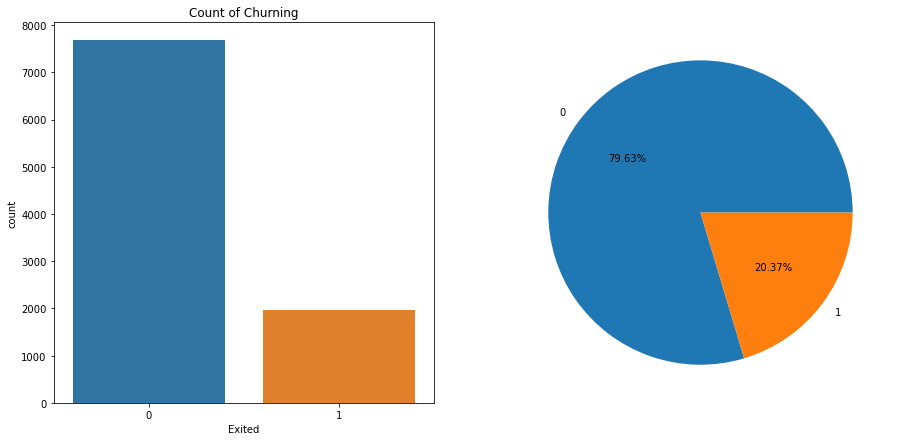

In [238]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Churning")                  
percentage = df["Exited"].value_counts()         
labels = list(df["Exited"].value_counts().index) 

sns.countplot(x = df["Exited"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

### Geography

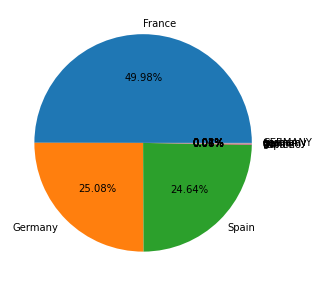

In [239]:
fig, ax = plt.subplots( figsize = (20, 5))
#ax[0].set_title("Geography")                  
percentage = df["Geography"].value_counts()         
labels = list(df["Geography"].value_counts().index) 

#sns.countplot(x = df["Geography"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

### Gender

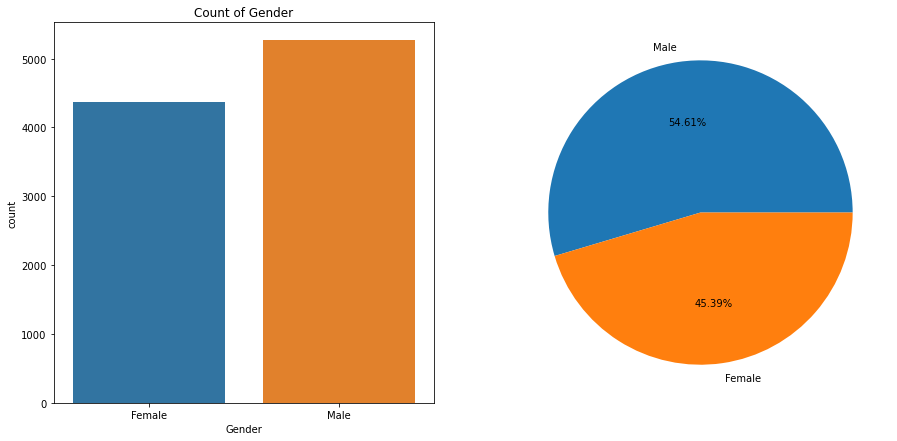

In [240]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Gender")                  
percentage = df["Gender"].value_counts()         
labels = list(df["Gender"].value_counts().index) 

sns.countplot(x = df["Gender"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

### Tenure

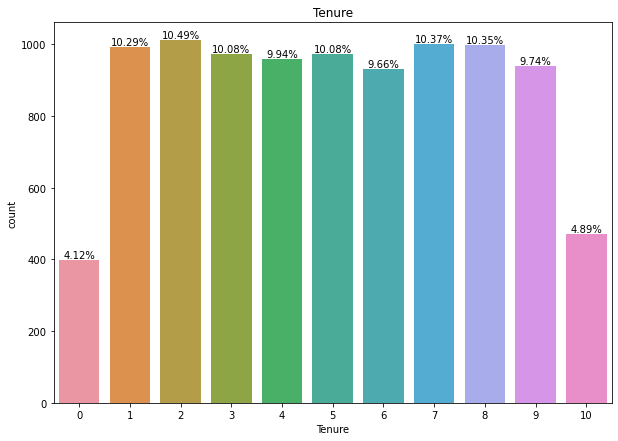

In [241]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Tenure"])
plt.title('Tenure')
for bar in ax.patches:                                              
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          
                                                                     
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    
plt.show()

### No. of Products

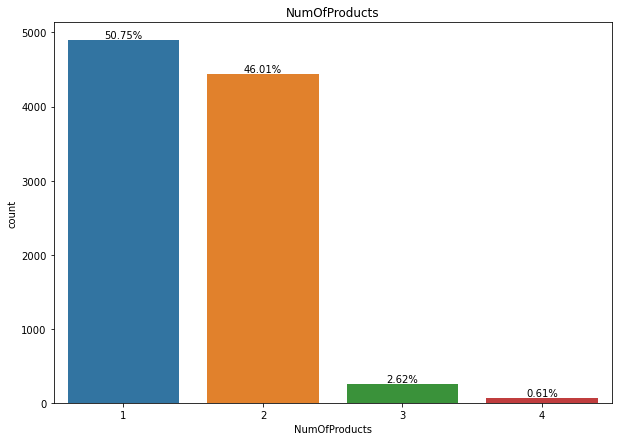

In [242]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["NumOfProducts"])
plt.title('NumOfProducts')
for bar in ax.patches:                                              
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          
                                                                     
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    
plt.show()

### Has Credit Card or Not

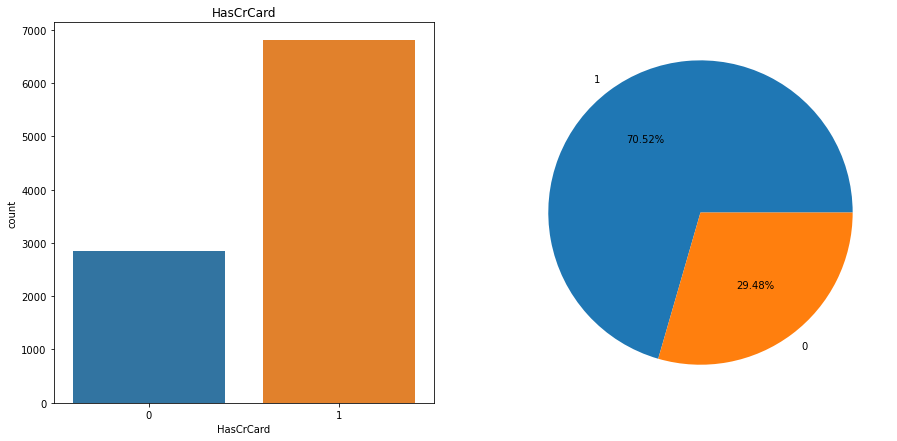

In [243]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("HasCrCard")                  
percentage = df["HasCrCard"].value_counts()         
labels = list(df["HasCrCard"].value_counts().index) 

sns.countplot(x = df["HasCrCard"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

### Is Active Member or Not

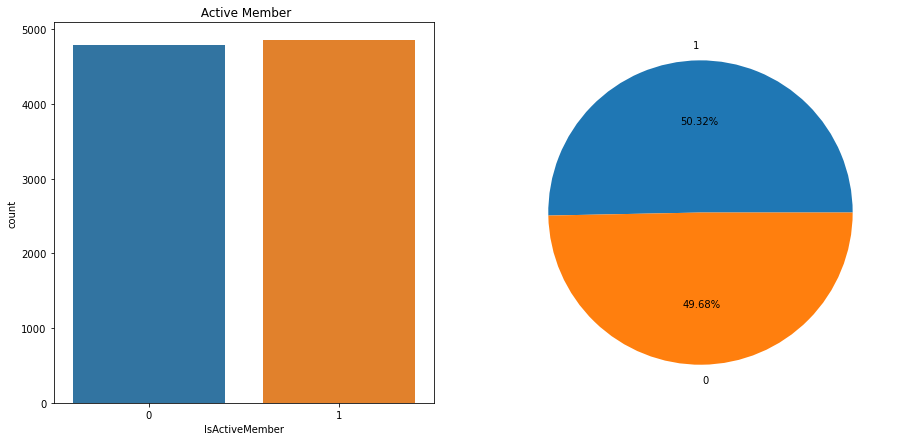

In [244]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title(" Active Member")                  
percentage = df["IsActiveMember"].value_counts()         
labels = list(df["IsActiveMember"].value_counts().index) 

sns.countplot(x = df["IsActiveMember"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

### Univariate Analysis of NumericalColumns

In [245]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

### Balance  

In [246]:
info_of_numerical("Balance")

The mean of the Balance is 76560.6725381181
The median of the Balance is 97318.25
The mode of the Balance is 0.0
The standard deviation of the Balance is 62401.698404510236
Number of missing values in the Balance is 0


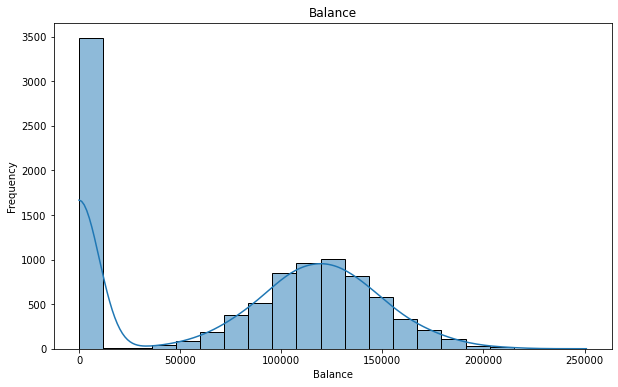

In [247]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Balance', data=df, kde=True)
plt.title('Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()


### Estimated Salary

In [248]:
info_of_numerical("EstimatedSalary")

The mean of the EstimatedSalary is 100172.42122290187
The median of the EstimatedSalary is 100324.01
The mode of the EstimatedSalary is 24924.92
The standard deviation of the EstimatedSalary is 57512.26541436057
Number of missing values in the EstimatedSalary is 0


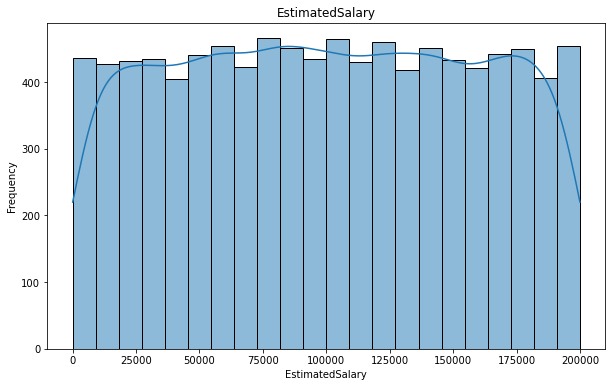

In [249]:
plt.figure(figsize=(10, 6))
sns.histplot(x='EstimatedSalary', data=df, kde=True)
plt.title('EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

### Credit Score

In [250]:
info_of_numerical("CreditScore")

The mean of the CreditScore is 650.2876257649622
The median of the CreditScore is 652.0
The mode of the CreditScore is 850
The standard deviation of the CreditScore is 96.69191964729248
Number of missing values in the CreditScore is 0


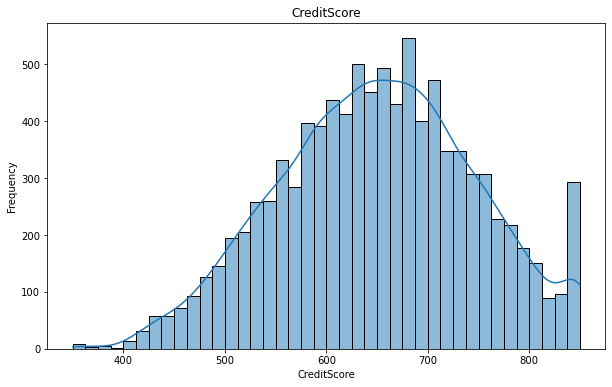

In [251]:
plt.figure(figsize=(10, 6))
sns.histplot(x='CreditScore', data=df, kde=True)
plt.title('CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

## Relationship between Target and Gender

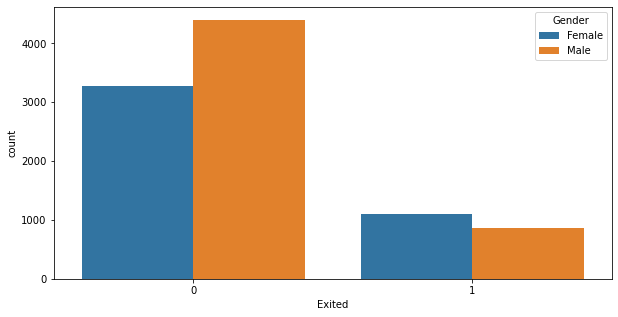

In [252]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "Exited", hue = "Gender", data = df)
plt.show()

## Relationship between Target and Age

Mean: 38
Median: 37.0
Minimum Age: 18
Maximum Age: 62


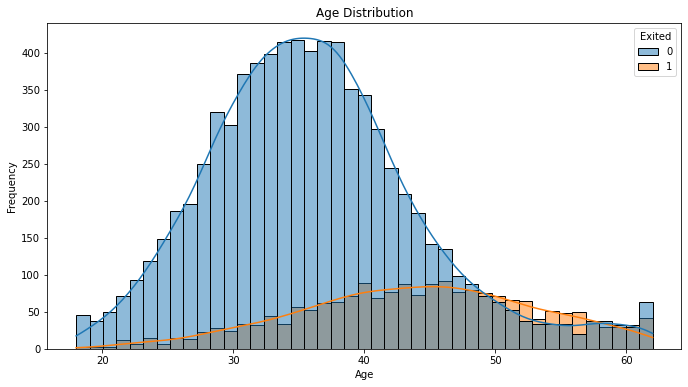

In [253]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='Age', hue="Exited" ,data=df, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
print(f'Mean: {(df["Age"].mean()):.0f}')
print(f'Median: {df["Age"].median()}')
print(f'Minimum Age: {df["Age"].min()}')
print(f'Maximum Age: {df["Age"].max()}')

## Relationship between Target and Tenure

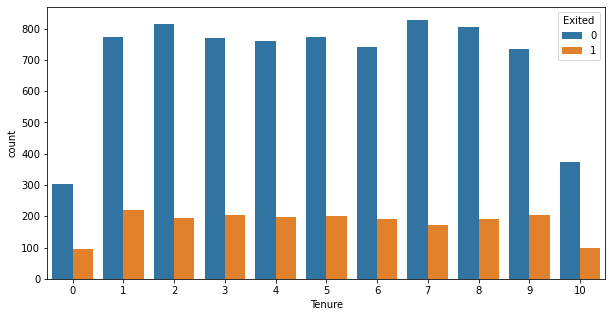

In [254]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "Tenure", hue = "Exited", data = df)
plt.show()

## Relationship between Target and HasCrCard

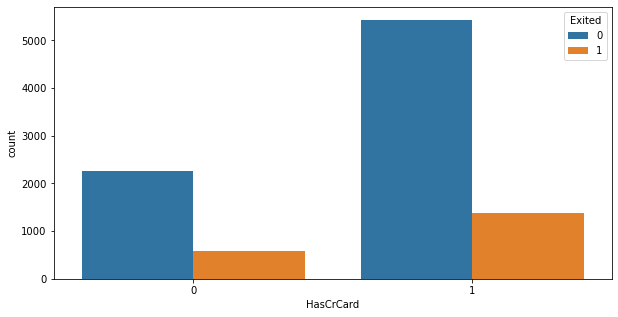

In [255]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "HasCrCard", hue = "Exited", data = df)
plt.show()

## Relationship between Target and Geography

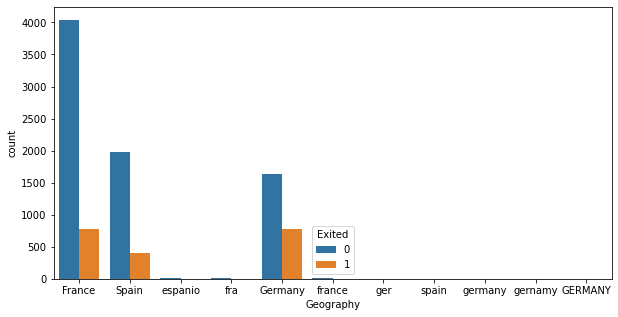

In [256]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "Geography", hue = "Exited", data = df)
plt.show()

In [257]:
df[df["Exited"] == 1][["Geography"]].value_counts()

Geography
Germany      783
France       780
Spain        395
france         2
ger            2
espanio        1
fra            1
dtype: int64

## MultiVariate Analysis

### Age vs Estimated Salary

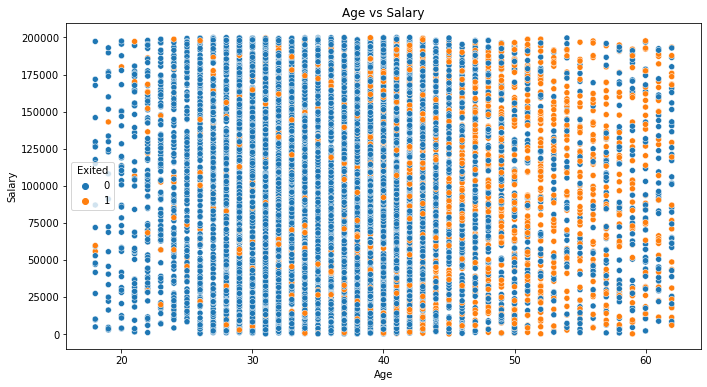

In [258]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Exited')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### Age vs Balance

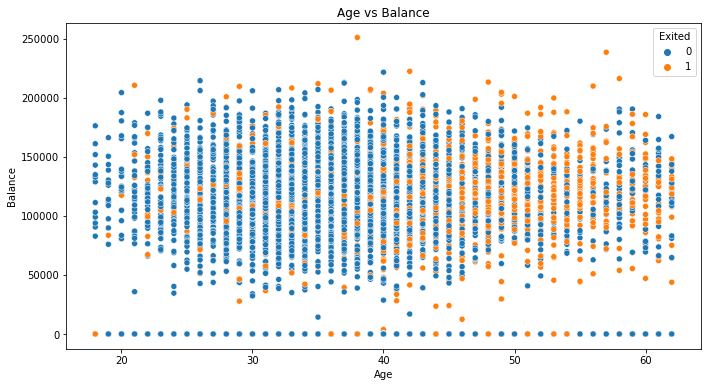

In [259]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Balance', data=df, hue='Exited')
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

### Correlation between Features To Target

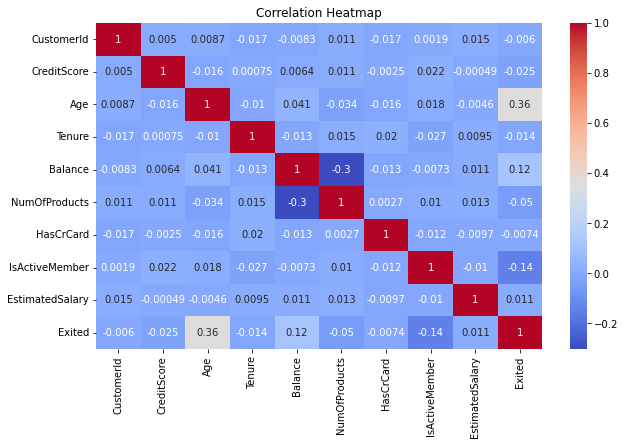

In [260]:
corr_num = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_num, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [261]:
plt.figure(figsize=(14,7))
df.corr()['Exited'].sort_values(ascending = False)

Exited             1.000000
Age                0.358888
Balance            0.116932
EstimatedSalary    0.011120
CustomerId        -0.006040
HasCrCard         -0.007369
Tenure            -0.013832
CreditScore       -0.025456
NumOfProducts     -0.050396
IsActiveMember    -0.144331
Name: Exited, dtype: float64

<Figure size 1008x504 with 0 Axes>

## Data Preprocessing

In [262]:
df = df.drop(columns=['CustomerId','Surname'])


In [263]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [264]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0


## Splitting Train and Test Data

In [271]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [272]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(x.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

() (9641,)
(6748, 10) (6748,)
(2893, 10) (2893,)


## Model Evaluation

### KNN Model

In [288]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
accuracy_knn = model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7939854821984099


### Decision Tree Classifier

In [289]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictdt_y = model.predict(X_test)
accuracy_dt = model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7874179052886278


### Random Forest Classifier

In [283]:
rf = RandomForestClassifier(random_state=42)      
rf = rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy score is: ',ac)
#y_pred_rf = rf.predict(X_test)
#print('Training-set Accuracy score is: ',accuracy_score(y_train,rf.predict(X_train)))

Accuracy score is:  0.8655375043207743


### Ada Boost Classifier

In [284]:
model = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.8565502938126512


### Gradient Boosting Classifier

In [287]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8613895610093328


# Conclusion